<a href="https://colab.research.google.com/github/kaifoerster/ML_Lab_1_Group-A/blob/main/Lab_Session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h2>Introduction to Colab</h2>
</div>

Colab is a notebook tool from Google or "Colaboratory", allows you to write and execute Python in your browser, without any installation required on your machine. It comes with some advantages:

1.  Zero configuration required
2.  Access to GPUs free of charge
3.  Easy sharing

For a full Colab tutorial, watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI).




<div class="markdown-google-sans">
  <h2>Workstation setup</h2>
</div>

During the lab, we will be working in Colab and use the lab [GitHub repo](https://github.com/Hertie-School-Deep-Learning-Fall-2023/Lab-Session) to upload and download resources.

Colab comes with most standard Python packages, that you can mostly directly import. For a list of all the available packages, type:

`!pip list command`.

In case you have to install a package (see below), type:

 `!pip install package_name` .










In [ ]:
import selenium

<div class="markdown-google-sans">
  <h2>Recap programming</h2>
</div>

We will start refreshing our programming skills using the notorious [1963 Iris database](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In [ ]:
import pandas as pd
import numpy as np
import numpy.random as rand
from sklearn.datasets import *

In [ ]:
data_dict = load_iris(as_frame=True)
df = data_dict['data']
label = data_dict['target']

In [ ]:
df.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


<Axes: >

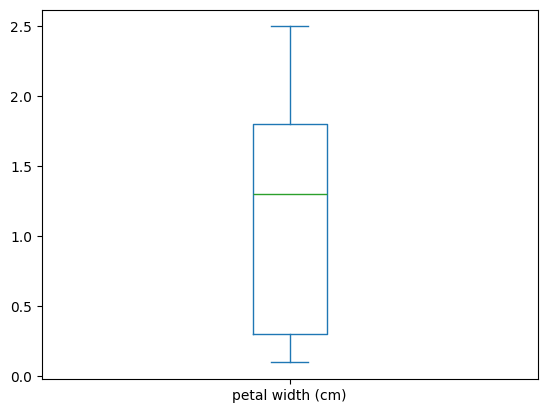

In [ ]:
df['petal width (cm)'].plot.box()

In [ ]:
df[df['sepal length (cm)'] <= 5].sort_values(by='sepal length (cm)',ascending=False)

In [ ]:
#TASK 1: print the average sepal length (cm) across all observations and its standard deviation.
print(df['sepal length (cm)'].mean())
print(df['sepal length (cm)'].std())

5.843333333333334
0.828066127977863


In [ ]:
#TASK 2: scatter plot the petal length against its petal width and color each data point according to its label.
#You may want to import matplotlib or your plotting library of choice.

In [ ]:
color = {0:"red", 1:"green", 2:"blue"}

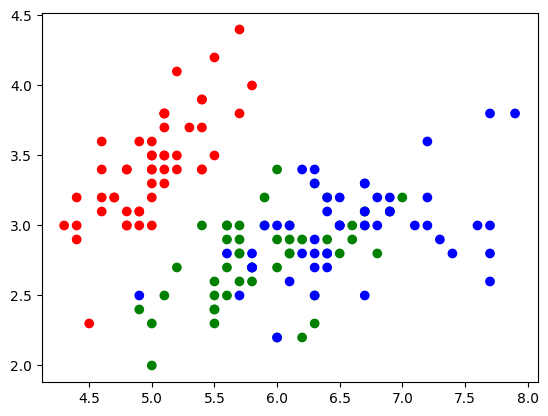

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], color = label.map(color))
plt.show()

<div class="markdown-google-sans">
  <h2>Object-oriented programming</h2>
</div>

We start by introducing some vocabulary:
<ul>
<li>A <code>class</code> is a blueprint for an object. It defines what belongs to the object (attributes) and what it can do (its methods). </li>
<li>An <code>object</code> is an initialized instance of a class.</li>
<li>A <code>method</code> or an <code>attribute</code> can be either be public, private or protected. The level of protections determines how they can be accessed outside the class. In Python, private and protected methods are prefixed by respectively two and one underscores. These are however a naming conventions that don't enforce access restrictions.</li>
A <code>subclass</code> or child class inherits methods and attributes from its parent class. It can override methods, i.e. implement them differently from the parent class.

In [ ]:
class Meal:
#Computes the price of your meal based on the total cost of is ingredients.

  def __init__(self, name, total_price=0):

    self.name = name
    self.ingredients = {}
    self.total_price = total_price


  def add_ingredient(self, ingredient, price=0):

    self.ingredients[ingredient] = price
    self.total_price = self.compute_total_price()


  def compute_total_price(self):

    return sum(price for price in self.ingredients.values())

  def add_ingredients(self, ingredients, prices):

    if len(ingredients) != len(prices):
      return None

    for i in range(len(ingredients)):

      ingredient, price = ingredients[i], prices[i]
      self.add_ingredient(ingredient, price)

In [ ]:
##EXAMPLE: compute the price of your morning porridge

Breakfast = Meal('porridge')

Breakfast.add_ingredient('oats',.5)
Breakfast.add_ingredient('berries',2)
Breakfast.add_ingredient('oat milk',1)
Breakfast.compute_total_price()

3.5

In [ ]:
#TASK 3: build class add_ingredients that takes as input a list of ingredients and a list of prices and add them to the meal.
#The function should also that the length of the two lists is compatible.

def add_ingredients(self, ingredients, prices):

    if len(ingredients) != len(prices):
      return None

    for i in range(len(ingredients)):

      ingredient, price = ingredients[i], prices[i]
      self.add_ingredient(ingredient, price)


In [ ]:
Breakfast.add_ingredients(['Flour', 'Sugar', 'Cornmeal'],[1, 0.5, 7])
Breakfast.ingredients

{'oats': 0.5,
 'berries': 2,
 'oat milk': 1,
 'Flour': 1,
 'Sugar': 0.5,
 'Cornmeal': 7}

In [ ]:
#TASK 4: we implement the child class HappyMeal. Add a private attribute to define the meal discount and a private class to apply discount.
#The discount should be applied when computing final price.

In [ ]:
class HappyMeal(Meal):
  def __init__(self, name = 'HappyMeal', total_price=0, discount=0.1):
    super().__init__(name, total_price)
    self.__discount = discount

    self.add_ingredient('nuggets', 4)
    self.add_ingredient('fries', 3)
    self.add_ingredient('fanta', 1.99)
    self.price = self.compute_total_price()

  def __apply_discount(self, price):
    return price*(1-self.__discount)

  def compute_total_price(self):
    total_price_without_discount =  super().compute_total_price()
    return self.__apply_discount(total_price_without_discount)



In [ ]:
#Answer from ChatGPT - you must specify the a name in this case

class HappyMeal(Meal):
    def __init__(self, name, total_price=0, discount=0.1):  # Assuming a default discount of 10%
        super().__init__(name, total_price)
        self.__discount = discount  # Private attribute to hold the discount

    def __apply_discount(self, price):  # Private method to apply discount
        return price * (1 - self.__discount)  # Assuming discount is a decimal. e.g., 0.1 for 10%

    def compute_total_price(self):
        # Calling the compute_total_price of the parent class
        total_price_without_discount = super().compute_total_price()
        # Applying discount using the private method
        return self.__apply_discount(total_price_without_discount)


In [ ]:
#Answer from class

class HappyMeal(Meal):

  def __init__(self, discount=.7):

    Meal.__init__(self, name='HappyMeal')

    self.add_ingredient('nuggets', 4)
    self.add_ingredient('fries', 3)
    self.add_ingredient('fanta', 1.99)
    self._discount = discount
    self.total_price = self.compute_total_price() *self._discount

In [ ]:
Breakfast = HappyMeal()
# Breakfast = HappyMeal('something')
Breakfast.name


'HappyMeal'

In [ ]:
HappyMeal().total_price

8.091000000000001